<a href="">
    <img src="https://cdn-images-1.medium.com/max/1200/1*u16a0WbJeckSdi6kGD3gVA.jpeg" width = 400> 
</a>
<h1 align="center"><font size=5 color="DE5538">NLP Assignment</font></h1>

## Introduction

Link to the Dataset: <a src="https://www.kaggle.com/crowdflower/twitter-airline-sentiment">https://www.kaggle.com/crowdflower/twitter-airline-sentiment</a>

Description of Data: A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

### Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk

!pip install emoji
import emoji

pd.set_option('display.max_colwidth', 100)
%matplotlib inline
sns.set(style="ticks", color_codes=True)

     |████████████████████████████████| 51 kB 125 kB/s eta 0:00:01
  Created wheel for emoji: filename=emoji-0.6.0-py3-none-any.whl size=49714 sha256=9c493fd52273f182167c3acd2dae8ce9e5f685c5cb63d7b4e71dc336906ead65
  Stored in directory: /home/jovyan/.cache/pip/wheels/4e/bf/6b/2e22b3708d14bf6384f862db539b044d6931bd6b14ad3c9adc
Successfully built emoji


In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### Load data

In [3]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [7]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Tweets.csv']))

In [8]:
df.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &...",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [9]:
print(f"DataFrame shape, Rows :{df.shape[0]} Columns : {df.shape[1]}")

DataFrame shape, Rows :14640 Columns : 15


In [10]:
info = df.info()
print(type(info))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [28]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [11]:
describe = df.describe(include='all')
describe

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
count,1.464000e+04,14640,14640.000000,9178,10522.000000,14640,40,14640,32,14640.000000,14640,1019,14640,9907,9820
unique,NaN,3,NaN,10,NaN,6,3,7701,13,NaN,14427,832,14247,3081,85
top,NaN,negative,NaN,Customer Service Issue,NaN,United,negative,JetBlueNews,Customer Service Issue,NaN,@united thanks,"[0.0, 0.0]",2015-02-24 09:54:34 -0800,"Boston, MA",Eastern Time (US & Canada)
freq,NaN,9178,NaN,2910,NaN,3822,32,63,12,NaN,6,164,5,157,3744
mean,5.692184e+17,NaN,0.900169,NaN,0.638298,NaN,NaN,NaN,NaN,0.082650,NaN,NaN,NaN,NaN,NaN
std,7.791112e+14,NaN,0.162830,NaN,0.330440,NaN,NaN,NaN,NaN,0.745778,NaN,NaN,NaN,NaN,NaN
min,5.675883e+17,NaN,0.335000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,5.685592e+17,NaN,0.692300,NaN,0.360600,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,5.694779e+17,NaN,1.000000,NaN,0.670600,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,5.698905e+17,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


In [12]:
count_df = describe.iloc[0]

print(f"{10*'*'} Columns having all values {10*'*'}\n{count_df[count_df == df.shape[0]]}\n")
print(f"{10*'*'} Columns missing values {10*'*'}\n{count_df[count_df < df.shape[0]]}\n")

********** Columns having all values **********
tweet_id                        14640
airline_sentiment               14640
airline_sentiment_confidence    14640
airline                         14640
name                            14640
retweet_count                   14640
text                            14640
tweet_created                   14640
Name: count, dtype: object

********** Columns missing values **********
negativereason                9178
negativereason_confidence    10522
airline_sentiment_gold          40
negativereason_gold             32
tweet_coord                   1019
tweet_location                9907
user_timezone                 9820
Name: count, dtype: object



### Observations
<li>tweet_id is unique tweet number and can be discarded</li>
<li>name is Passenger/Company name and can be discarded</li>
<li>negativereason_gold, airline_sentiment_gold, tweet_coord can be discarded as they have few entries.</li>
<li>user_timezone can be discarded.</li>
<li>airline_sentiment can be discarded.</li>

## Data Analysis

In [13]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [15]:
import sys
sys.path.append('/content/gdrive/MyDrive/mylib')

#### Importing my custom python library which has methods for charts and text processing

In [ ]:
import charts

#### Plot Donut chart for airline and airline_sentiment
##### Most of the Reviews are negative - 62.7%
##### Major market share is with 'United' and 'US Airways'

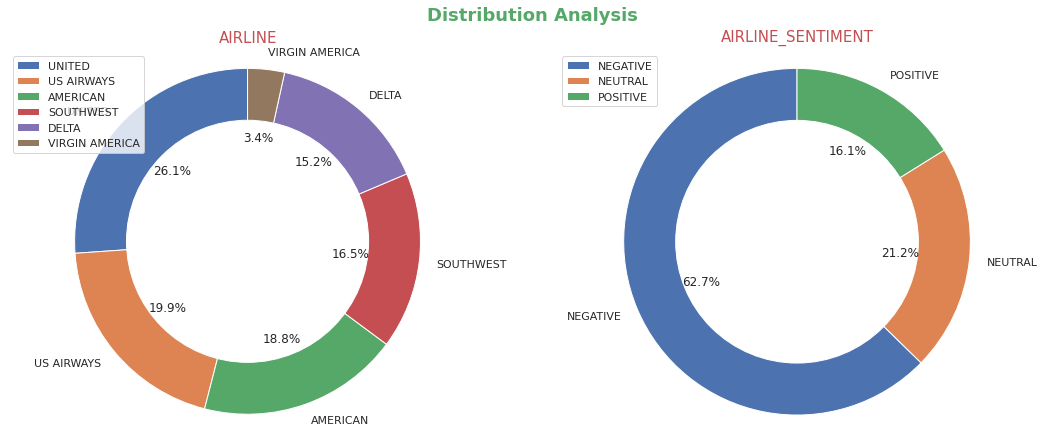

In [16]:
charts.bi_donut(df[["airline","airline_sentiment"]].copy(), "Distribution Analysis")

**Plot distribution of Airline and ariline_sentiments in them**

airline         airline_sentiment
American        negative             1960
                neutral               463
                positive              336
Delta           negative              955
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative             2263
                neutral               381
                positive              269
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral               171
                positive              152
Name: airline_sentiment, dtype: int64


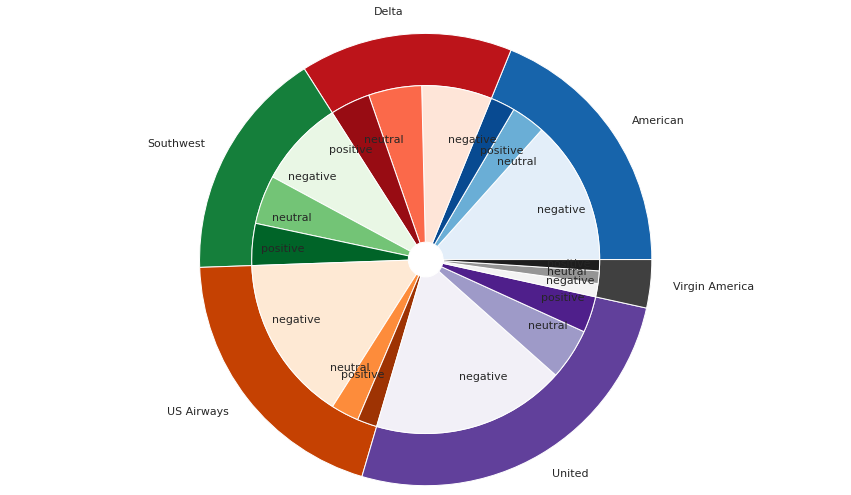

In [17]:
data = df.groupby(by=['airline', 'airline_sentiment'])['airline_sentiment'].count()
print(data)
charts.double_donut(data)

#### Airline Sentiment Confidence
We can see mean Airline sentiment confidence is usually very high 
and scattered thorughly for each airline thus may not be a useful feature to keep

In [18]:
df.groupby(by=['airline'])['airline_sentiment_confidence'].mean()

airline
American          0.917352
Delta             0.869878
Southwest         0.886516
US Airways        0.921578
United            0.900878
Virgin America    0.876086
Name: airline_sentiment_confidence, dtype: float64

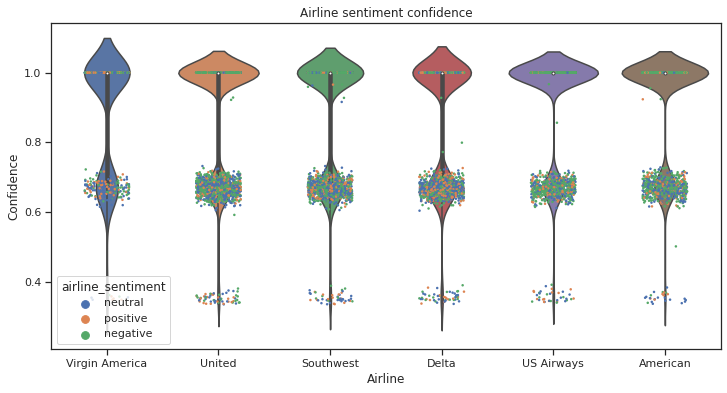

In [19]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.stripplot(x='airline', y='airline_sentiment_confidence', data=df
                   ,hue='airline_sentiment', jitter=0.2, size=2.5)
ax = sns.violinplot(x='airline', y='airline_sentiment_confidence', data=df)
# ax = sns.boxplot(x='airline', y='airline_sentiment_confidence', data=df)
# plt.title("", )
ax.set(title='Airline sentiment confidence', xlabel='Airline', ylabel='Confidence')
_ = plt.show()


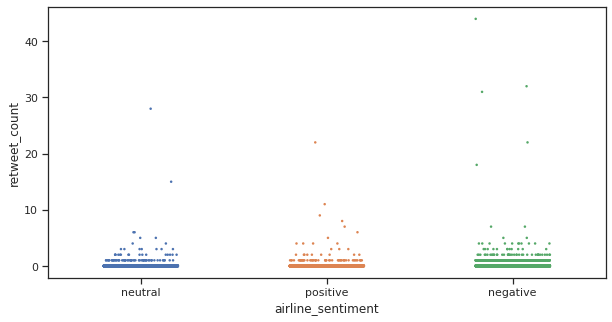

In [20]:
fig, ax = plt.subplots(figsize=(10,5))

sns.stripplot(x='airline_sentiment', y='retweet_count', data=df, jitter=0.2, size=2.5)

## Data Preparation
Drop unwanted columns and prepare the data by performing below operations on the text.<br>
<li>Remove all the unwanted characters and punctuations
<li>Convert text to tokens of String
<li>Remove the stopwords 
<li>Perform Lamentizing on the tokens
<li>Merge the tokens to form final text for feature engineering

In [8]:
df.drop(axis=1, labels=['tweet_id','name','negativereason_gold','airline_sentiment_gold', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone'], inplace=True)
df.head(2)

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,retweet_count,text
0,neutral,1.0000,NaN,NaN,Virgin America,0,@VirginAmerica What @dhepburn said.
1,positive,0.3486,NaN,0.0,Virgin America,0,@VirginAmerica plus you've added commercials to the experience... tacky.


In [29]:
df["airline_sentiment"].replace({"neutral":0, "negative":1, "positive":2}, inplace =True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


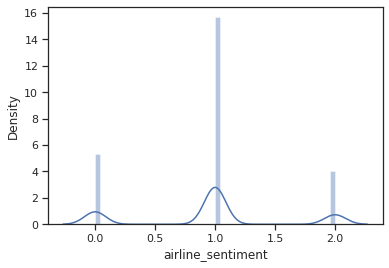

In [30]:
sns.distplot(df["airline_sentiment"])

### Displaying the code of text module from my custom library

In [ ]:
import pandas as pd 
import numpy as np 
import string
import re
import nltk
import emoji

stopwords = nltk.corpus.stopwords.words('english')

# Download the Wordnet package if not available, it is required by Lemmantizer
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()


# Function to remove punctuation from given string
def remove_puntuaction(text):
    return ''.join([char for char in text if char not in string.punctuation])

# Function to Tokenize the given string and remove stopwords from them
def tokenize_stopwords(text):
    tokens = [word for word in re.split('\W+', text) if word not in stopwords]
    return tokens

# Funciton to perform stemming on the Words
def stemming(tokens):
    return [ps.stem(word) for word in tokens]

# Funciton to perform stemming on the Words
def lamentize(tokens):
    return [wn.lemmatize(word) for word in tokens]

def remove_emoji(text):
    return re.sub(r':','', emoji.demojize(text))

def remove_url(text):
    return re.sub(r'http\S+', '',text) # Remove URLs

def remove_dollar(text):
    return re.sub(r'\$\S+', 'dollar', text) # Change dollar amounts to dollar

def remove_special_chars(text):
    spl_chars = ['#','!','@']
    for char in spl_chars :
        text = re.sub('@', '', text) 
    
    return text

# Function to remove punctuation and Tokenize
def clean_text(text):
    text = remove_puntuaction(text)
    tokens = tokenize_stopwords(text)
    text = ' '.join(lamentize(tokens))
    return text


In [21]:
# Import text module from custom library Mylib
import text as txt

def process_tweet(text):
    text = str(text).lower()                   # Convert to lower
    text = text.replace(r'\W+',' ')             # Replace any White characters
    text = txt.remove_emoji(text)              # Remove any Emoji characters
    text = txt.remove_puntuaction(text)        # Remove Punctuations
    text = txt.remove_url(text)                # Remove URL
    text = txt.remove_special_chars(text)      # Remove any special Characters
    
    # Split text into tokens
    tokens = txt.tokenize_stopwords(text)      # Remove english stopwords
    text = ' '.join(txt.lamentize(tokens))     # Lamentize the words in the text
    return tokens

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [25]:
df['text'].apply(process_tweet)
df['text'].head(10)

0                                                                     virginamerica what  dhepburn said 
1                                virginamerica plus you ve added commercials to the experience    tacky 
2                                 virginamerica i didn t today    must mean i need to take another trip 
3     virginamerica it s really aggressive to blast obnoxious  entertainment  in your guests  faces  ...
4                                                 virginamerica and it s a really big bad thing about it
5     virginamerica seriously would pay  30 a flight for seats that didn t have this playing  it s re...
6                         virginamerica yes  nearly every time i fly vx this  ear worm  won t go away   
7     virginamerica really missed a prime opportunity for men without hats parody  there  https   t c...
8                                                         virginamerica well  i didn t but now i do    d
9                        virginamerica it was amazing  

# Yelp Dataset


In [27]:
# For the Stop Words
from nltk.corpus import stopwords

# Convert the words into count vector
from sklearn.feature_extraction.text import CountVectorizer

# Used to pipe line
from sklearn.feature_extraction.text import TfidfTransformer

# Train test split
from sklearn.model_selection import train_test_split

# Model
from sklearn.naive_bayes import MultinomialNB

# For Report
from sklearn.metrics import confusion_matrix, class%matplotlib inline

# **NLP Model**


In [32]:
X_Data = df["text"]
Y_Data = df["airline_sentiment"]

cv = CountVectorizer()
X_Data = cv.fit_transform(X_Data)
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data, Y_Data, test_size=0.3, random_state=101)
model = MultinomialNB()
model.fit(X_Train,Y_Train)
predicted = model.predict(X_Test)
print(classification_report(Y_Test, predicted))

              precision    recall  f1-score   support

           0       0.68      0.38      0.49       947
           1       0.76      0.95      0.85      2738
           2       0.79      0.49      0.61       707

    accuracy                           0.76      4392
   macro avg       0.75      0.61      0.65      4392
weighted avg       0.75      0.76      0.73      4392



**Plot confusion Matrix**

In [34]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          title='Confusion matrix'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """    
    data = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(data, columns=classes, index = classes).astype('float')
    
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    plt.figure(figsize = (12,8))
    plt.title(title, color='green', fontsize=25)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, color='indigo')
    plt.yticks(tick_marks, classes, color='indigo')
    sns.set(font_scale=1.4) #for label size
    sns.heatmap(df_cm, cmap="YlGnBu", annot=True, annot_kws={"size": 16}, fmt=".0f")
    # plt.imshow(df_cm, interpolation='nearest', cmap="YlGnBu")
    plt.tight_layout()
    plt.ylabel('Actual', color='crimson', fontsize=20)
    plt.xlabel('Predicted', color='crimson', fontsize=20)

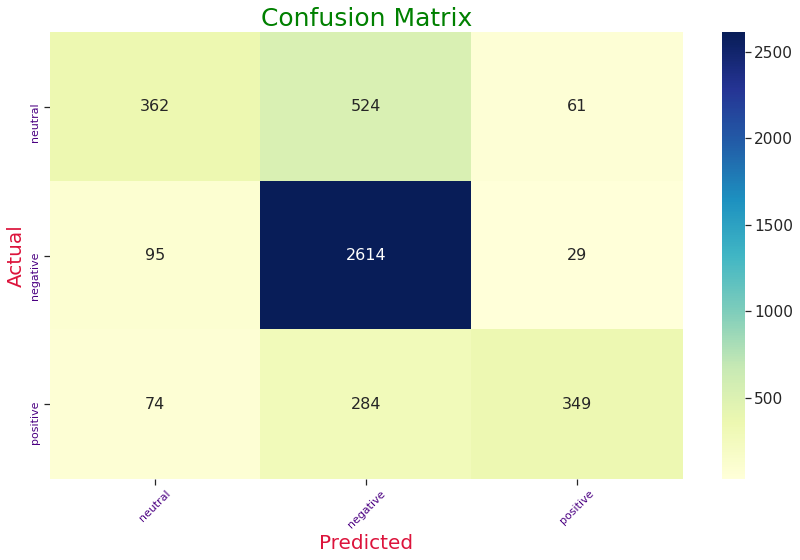

In [35]:
plot_confusion_matrix(Y_Test, predicted, ['neutral','negative', 'positive'], title="Confusion Matrix")

# **POS Tagging**


In [36]:
# pip install spacy
import spacy
# python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

import stringm")

In [37]:
from nltk import word_tokenize, pos_tag, pos_tag_sents
import nltk 
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [38]:
texts = df['text'].head(4).tolist()
texts

[' virginamerica what  dhepburn said ',
 ' virginamerica plus you ve added commercials to the experience    tacky ',
 ' virginamerica i didn t today    must mean i need to take another trip ',
 ' virginamerica it s really aggressive to blast obnoxious  entertainment  in your guests  faces  amp  they have little recourse']

In [39]:
tagged_texts = pos_tag_sents(map(word_tokenize, texts))
tagged_texts

[[('virginamerica', 'NN'),
  ('what', 'WP'),
  ('dhepburn', 'NN'),
  ('said', 'VBD')],
 [('virginamerica', 'NN'),
  ('plus', 'CC'),
  ('you', 'PRP'),
  ('ve', 'VBP'),
  ('added', 'JJ'),
  ('commercials', 'NNS'),
  ('to', 'TO'),
  ('the', 'DT'),
  ('experience', 'NN'),
  ('tacky', 'NN')],
 [('virginamerica', 'NN'),
  ('i', 'NN'),
  ('didn', 'VBP'),
  ('t', 'NN'),
  ('today', 'NN'),
  ('must', 'MD'),
  ('mean', 'VB'),
  ('i', 'NNS'),
  ('need', 'VBP'),
  ('to', 'TO'),
  ('take', 'VB'),
  ('another', 'DT'),
  ('trip', 'NN')],
 [('virginamerica', 'NN'),
  ('it', 'PRP'),
  ('s', 'VBZ'),
  ('really', 'RB'),
  ('aggressive', 'JJ'),
  ('to', 'TO'),
  ('blast', 'VB'),
  ('obnoxious', 'JJ'),
  ('entertainment', 'NN'),
  ('in', 'IN'),
  ('your', 'PRP$'),
  ('guests', 'NNS'),
  ('faces', 'VBZ'),
  ('amp', 'IN'),
  ('they', 'PRP'),
  ('have', 'VBP'),
  ('little', 'JJ'),
  ('recourse', 'NN')]]

# **Dependency Parser Tree**

In [1]:
import spacy
from spacy import displacy
from nltk import Tree
# Load English tokenizer, tagger, parser, NER and word vectors
nlp = spacy.load("en")

doc = nlp(u"Ned's eldest son, Robb, gathered an army and rose up in rebellion against the Lannisters, trying to win the independence of his kingdom.")

### Note: Please run the below cell to view chart, Chart is only visible if current notebook is being executed

In [2]:
displacy.render(doc, style= 'dep',jupyter=True, options={'distance ': 100})

In [3]:
# Generate chart using NLTK library as well
def tok_format(tok):
    return "_".join([tok.orth_, tok.tag_])


def to_nltk_tree(node):
    if node.n_lefts + node.n_rights > 0:
        return Tree(tok_format(node), [to_nltk_tree(child) for child in node.children])
    else:
        return tok_format(node)

In [20]:
[to_nltk_tree(sent.root).pretty_print() for sent in doc.sents]

                                       gathered_VBD                                                                              
   _________________________________________|________________________________                                                     
  |     |                    |                         |                  rose_VBD                                               
  |     |                    |                         |       ______________|__________________                                  
  |     |                    |                         |      |    |         |              trying_VBG                           
  |     |                    |                         |      |    |         |                  |                                 
  |     |                    |                         |      |    |       in_IN              win_VB                             
  |     |                    |                         |      |    |         |         

[None]